In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib

此次分析去去除了部分异常数据，一些特征缺失数据无法成为特征分析选取的依据

In [2]:
path = "./data/formal_data.xlsx"

In [3]:
df_all = pd.read_excel(path)

In [4]:
df_all.head()

,PROD_ID,CALL_MONTH,VIP_LEVEL,ONLINE_MONTH,GENDER,IF_BLACK,AGE_SEG,IF_GROUP,IF_SCHOOL,IF_BRD,...,CALLED_DRTN,CALLED_DRTN01,CALLED_DRTN02,CALLED_DRTN03,CALL_COUNT,CALLING_DRTN01,CALLING_DRTN02,CALLING_DRTN03,IF_TOUCH,判断
0,234256589252,201907,5,70,1,0,40,1,0,0,...,70,21.0,55.0,90.0,27,75.0,114.0,255.0,0,1
1,234612472495,201907,5,7,1,0,50,1,0,0,...,1,0.0,0.0,1.0,0,0.0,0.0,5.0,0,1
2,234241741087,201907,0,73,1,0,30,0,0,0,...,50,37.0,61.0,84.0,14,108.0,225.0,227.0,0,1
3,234613632880,201907,0,6,2,0,50,0,0,0,...,1,2.0,0.0,0.0,0,3.0,1.0,0.0,0,1
4,234620806728,201907,4,5,1,0,45,0,0,0,...,161,119.0,43.0,21.0,242,327.0,198.0,205.0,0,1


In [5]:
# 接收回访的正样本
df_Y = df_all[df_all['IF_TOUCH']==1]

In [6]:
print('总样本个数：' + str(len(df_all)))
print('正样本个数：' + str(len(df_Y)))

总样本个数：57787
正样本个数：4362


In [9]:
df_Y

,PROD_ID,CALL_MONTH,VIP_LEVEL,ONLINE_MONTH,GENDER,IF_BLACK,AGE_SEG,IF_GROUP,IF_SCHOOL,IF_BRD,...,CALLED_DRTN,CALLED_DRTN01,CALLED_DRTN02,CALLED_DRTN03,CALL_COUNT,CALLING_DRTN01,CALLING_DRTN02,CALLING_DRTN03,IF_TOUCH,判断
97,234377385817,201911,5,44,1,0,30,0,0,0,...,231,230.0,264.0,126.0,92,490.0,509.0,218.0,1,0
105,234335986425,201911,4,60,1,0,25,0,0,0,...,537,468.0,364.0,331.0,403,272.0,371.0,472.0,1,0
127,234238972129,201911,4,77,1,0,55,0,0,0,...,341,330.0,303.0,264.0,93,230.0,198.0,180.0,1,0
129,234371276379,201911,5,48,1,0,25,0,0,0,...,20,10.0,34.0,24.0,19,6.0,21.0,28.0,1,0
135,234212296149,201911,3,104,1,0,50,0,0,0,...,60,64.0,81.0,128.0,23,59.0,43.0,85.0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57782,234208595193,201911,3,119,1,0,35,1,0,1,...,369,254.0,532.0,498.0,38,68.0,198.0,72.0,1,1
57783,234207020843,201911,4,125,2,0,35,1,0,1,...,532,543.0,768.0,577.0,180,361.0,309.0,313.0,1,1
57784,234213281424,201911,4,101,1,0,45,0,0,1,...,274,97.0,106.0,115.0,52,68.0,28.0,26.0,1,1
57785,234396242630,201911,5,32,1,0,35,0,0,1,...,0,0.0,4.0,0.0,0,0.0,4.0,0.0,1,1


In [10]:
# 所有的标签字段
tags = df_all.columns

In [11]:
tags

Index(['PROD_ID', 'CALL_MONTH', 'VIP_LEVEL', 'ONLINE_MONTH', 'GENDER',
       'IF_BLACK', 'AGE_SEG', 'IF_GROUP', 'IF_SCHOOL', 'IF_BRD',
       'IF_DBL_TRMNL', 'TRMNL_AGE', 'IF_4G_TRMNL', 'IF_VOLTE', 'BRD_RAX',
       'BRD_ACTIVE_DAYS', 'IF_ITV', 'CHRG', 'DATA_FLOW_AMNT',
       'DATA_FLOW_AMNT01', 'DATA_FLOW_AMNT02', 'CALL_DRTN', 'CALL_DRTN01',
       'CALL_DRTN02', 'DATA_FLOW_AMNT_PRV', 'DATA_FLOW_AMNT_ROAM_PRV',
       'DATA_FLOW_AMNT_ROAM_PRV01', 'DATA_FLOW_AMNT_ROAM_PRV02',
       'DATA_FLOW_AMNT_5G', 'DATA_FLOW_AMNT_4G', 'SMS_COUNT',
       'CALLING_NET_COUNT', 'CALL_NET_DRTN', 'VOICE_CHRG', 'DATA_CHRG',
       'CALLED_DRTN', 'CALLED_DRTN01', 'CALLED_DRTN02', 'CALLED_DRTN03',
       'CALL_COUNT', 'CALLING_DRTN01', 'CALLING_DRTN02', 'CALLING_DRTN03',
       'IF_TOUCH', '判断'],
      dtype='object')

In [20]:
def compulete_count_normalized(data, min_v, max_v, space, label='counts'):
    """
    统计一列中各个区间中数值的个数和其对应归一化的值
    data: 列的Series形式
    min_v: 区间最小值
    max_v: 区间最大值
    space： 区间间隔
    """
    # 处理最大、最小值
    if max_v % 10 > 0:
        max_v = max_v - (max_v % 10) + 10
    if min_v % 10 > 0:
        min_v = min_v - (min_v % 10)
    # 需要分段的区间
    sections = [x for x in range(min_v, max_v, space)]
    # 每个区间中的个数
    counts = []
    # 每个区间中的个数的比例即归一化
    counts_normalize = []
    for i in range(0, len(sections)-1):
        # 区间中个数统计
        part_count = data.value_counts(bins=[sections[i], sections[i+1]-1])
        part_count_normalize = data.value_counts(bins=[sections[i], sections[i+1]-1], normalize=True)
        counts.append(part_count)
        counts_normalize.append(part_count_normalize)
    # 合并Series
    result1 = pd.DataFrame(pd.concat([x for x in counts]))
    result2 = pd.DataFrame(pd.concat([x for x in counts_normalize]))
    # 对列的标签进行重命名
    result1.rename(columns={result1.columns[0]:label},inplace=True)
    result2.rename(columns={result2.columns[0]:'normalized'}, inplace=True)
    # 合并两个表
    result = pd.concat([result1, result2], axis=1)
    return result

In [17]:
def compulete_count_normalized_categories(data):
    """
    统计类别的个数及其归一化值
    """
    counts = data.value_counts()
    counts_normalize = data.value_counts(normalize=True)
    # 合并Series
    result1 = pd.DataFrame(counts)
    result2 = pd.DataFrame(counts_normalize)
    # 对列的标签进行重命名
    result1.rename(columns={result1.columns[0]:'counts'},inplace=True)
    result2.rename(columns={result2.columns[0]:'normalized'}, inplace=True)
    # 合并两个表
    result = pd.concat([result1, result2], axis=1)
    return result

In [11]:
matplotlib.rcParams['font.sans-serif'] = ['KaiTi']

# 对VIP_LEVEL的统计分析 

In [14]:
df_all.VIP_LEVEL.min()

0

In [15]:
df_all.VIP_LEVEL.max()

7

In [21]:
all_vip_level = compulete_count_normalized_categories(df_all.VIP_LEVEL)
y_vip_level = compulete_count_normalized_categories(df_Y.VIP_LEVEL)

In [22]:
all_vip_level

,counts,normalized
4,14217,0.246024
0,11167,0.193244
3,9419,0.162995
5,8348,0.144462
2,6696,0.115874
1,6665,0.115337
6,970,0.016786
7,305,0.005278


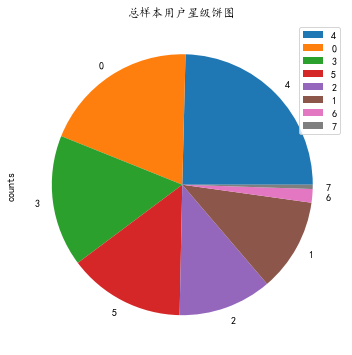

In [23]:
all_vip_level.plot.pie(y="counts",figsize=(6, 6), title='总样本用户星级饼图')

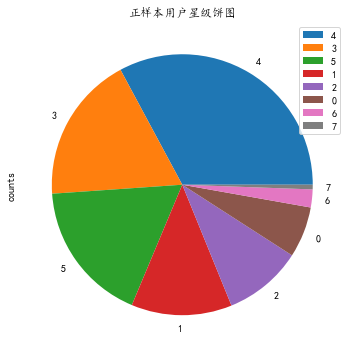

In [24]:
y_vip_level.plot.pie(y="counts",figsize=(6, 6), title='正样本用户星级饼图')

总样本与正样本分布相近，且正样本中分布较为平均，分析价值不大

# 对ONLINE_MONTH的统计分析

In [27]:
df_all_ONLINE_MONTH = df_all.ONLINE_MONTH
df_Y_ONLINE_MONTH = df_Y.ONLINE_MONTH

In [28]:
all_result = compulete_count_normalized(df_all_ONLINE_MONTH, 0, 230, 10)
Y_result = compulete_count_normalized(df_Y_ONLINE_MONTH, 0, 230, 10)

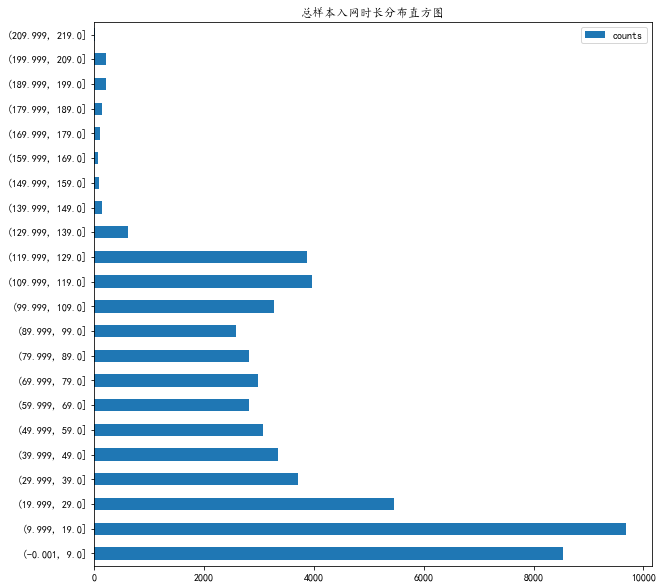

In [29]:
all_result.plot.barh(y="counts",figsize=(10, 10), title='总样本入网时长分布直方图')

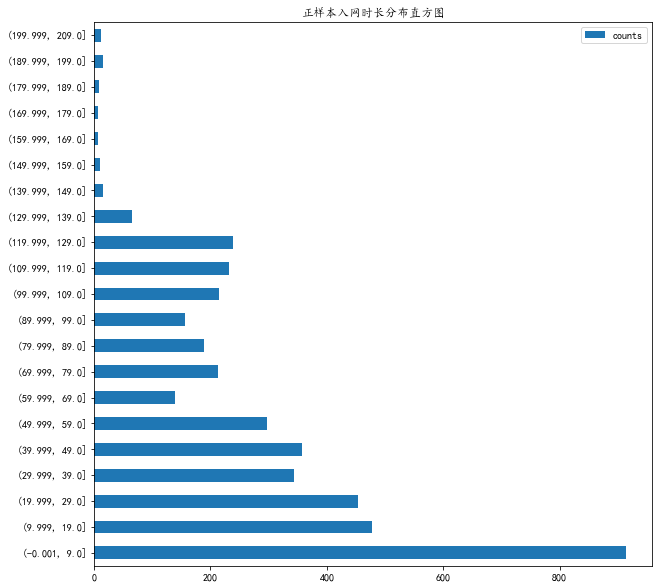

In [65]:
Y_result.plot.barh(y="counts",figsize=(10, 10), title='正样本入网时长分布直方图')

易接收回访调查的用户主要分布在入网时长少的区域

# 对GENDER的统计分析

In [30]:
all_gender_result = compulete_count_normalized_categories(df_all.GENDER)
y_gender_result = compulete_count_normalized_categories(df_Y.GENDER)

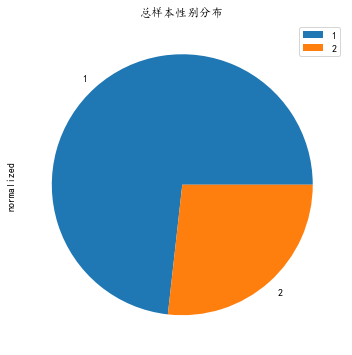

In [31]:
all_gender_result.plot.pie(y='normalized', figsize=(6, 6), title='总样本性别分布')

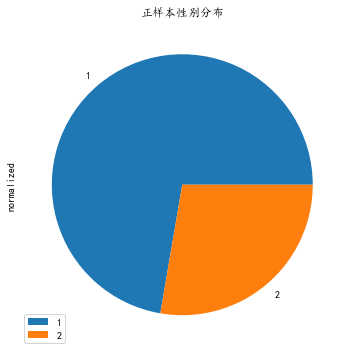

In [32]:
y_gender_result.plot.pie(y='normalized', figsize=(6, 6), title='正样本性别分布')

性别为1的用户所占比重极大

# 对AGE_SEG的统计分析

In [33]:
all_age = df_all.AGE_SEG
y_age = df_Y.AGE_SEG

In [34]:
print('当前字段的最小值为：' + str(all_age.min()))
print('当前字段的最大值为：' + str(y_age.max()))

当前字段的最小值为：15
当前字段的最大值为：85


In [35]:
all_age_result = compulete_count_normalized(all_age, 10, 100, 10)
y_age_result = compulete_count_normalized(y_age, 10, 100, 10)

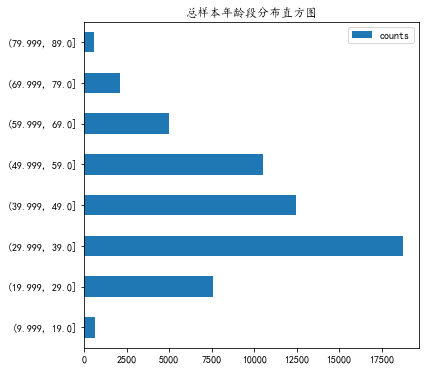

In [36]:
all_age_result.plot.barh(y="counts", figsize=(6, 6), title='总样本年龄段分布直方图')

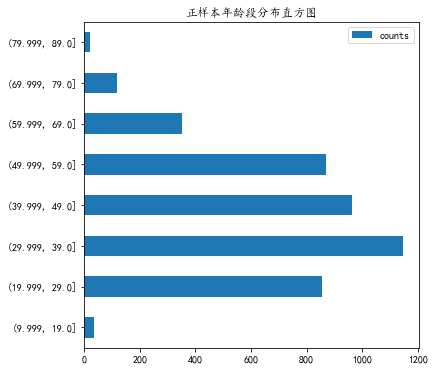

In [37]:
y_age_result.plot.barh(y="counts", figsize=(6, 6), title='正样本年龄段分布直方图')

总样本年龄段数据采集不均衡，当前分析主要年段集中在20——60岁，60岁后易访数量不断下降

# 对IF_GROUP的统计分析

In [38]:
all_if_group = compulete_count_normalized_categories(df_all.IF_GROUP)
y_if_group = compulete_count_normalized_categories(df_Y.IF_GROUP)

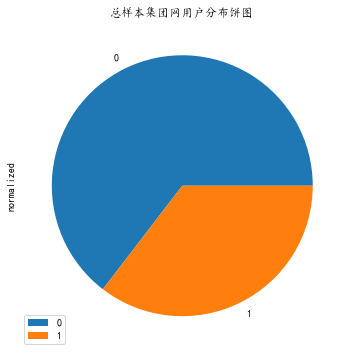

In [39]:
all_if_group.plot.pie(y="normalized", figsize=(6, 6), title='总样本集团网用户分布饼图')

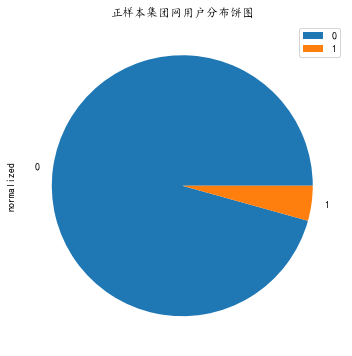

In [40]:
y_if_group.plot.pie(y="normalized", figsize=(6, 6), title='正样本集团网用户分布饼图')

非集团用户所占比重较大

# 对IF_SCHOOL的统计分析

In [44]:
all_if_school = compulete_count_normalized_categories(df_all.IF_SCHOOL)
y_if_school = compulete_count_normalized_categories(df_Y.IF_SCHOOL)

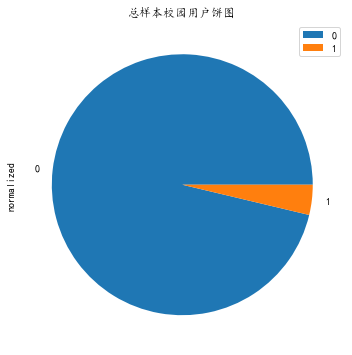

In [45]:
all_if_school.plot.pie(y="normalized", figsize=(6, 6), title='总样本校园用户饼图')

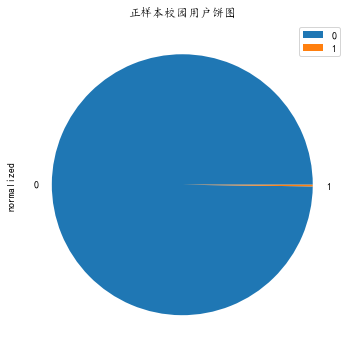

In [46]:
y_if_school.plot.pie(y="normalized", figsize=(6, 6), title='正样本校园用户饼图')

总样本采集不均衡，当前结果为非校园用户所占比重极大

# 对IF_BRD的统计分析

In [47]:
all_if_brd = compulete_count_normalized_categories(df_all.IF_BRD)
y_if_brd = compulete_count_normalized_categories(df_Y.IF_BRD)

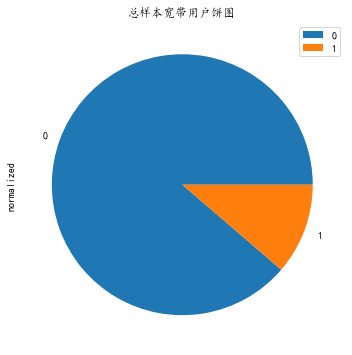

In [48]:
all_if_brd.plot.pie(y="normalized", figsize=(6, 6), title='总样本宽带用户饼图')

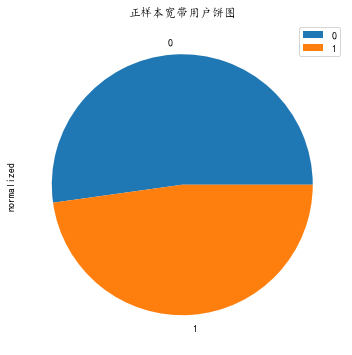

In [49]:
y_if_brd.plot.pie(y="normalized", figsize=(6, 6), title='正样本宽带用户饼图')

宽带用户在正样本中的比例相较于总样本大幅度上升

# 对BRD_RAX的统计分析

In [51]:
all_brd_rax = compulete_count_normalized(df_all.BRD_RAX, 0, 600, 30)
y_brd_rax = compulete_count_normalized(df_Y.BRD_RAX, 0, 600, 30)

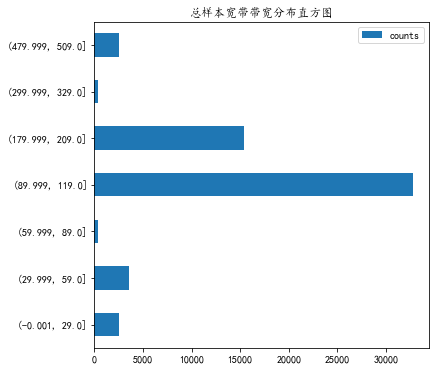

In [52]:
all_brd_rax.plot.barh(y="counts", figsize=(6, 6), title='总样本宽带带宽分布直方图')

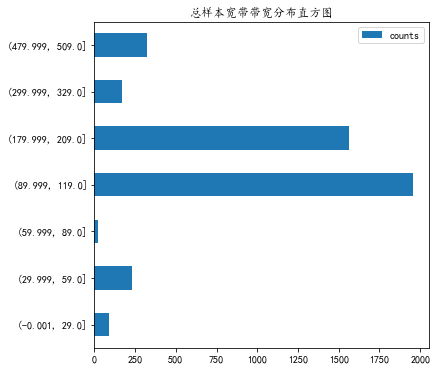

In [53]:
y_brd_rax.plot.barh(y="counts", figsize=(6, 6), title='总样本宽带带宽分布直方图')

总样本和正样本中宽带速率在100-200的用户占大多数

# 对BRD_ACTIVE_DAYS的统计分析

In [54]:
all_brd_active_days = compulete_count_normalized(df_all.BRD_ACTIVE_DAYS, 0, 36, 5)
y_brd_active_days = compulete_count_normalized(df_Y.BRD_ACTIVE_DAYS, 0, 36, 5)

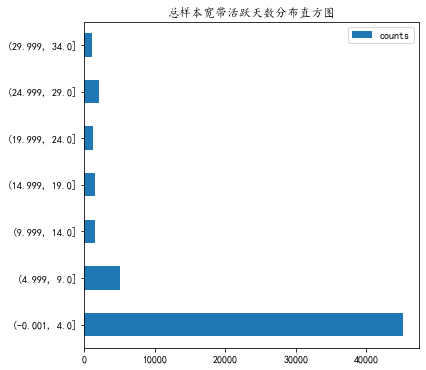

In [55]:
all_brd_active_days.plot.barh(y="counts", figsize=(6, 6), title='总样本宽带活跃天数分布直方图')

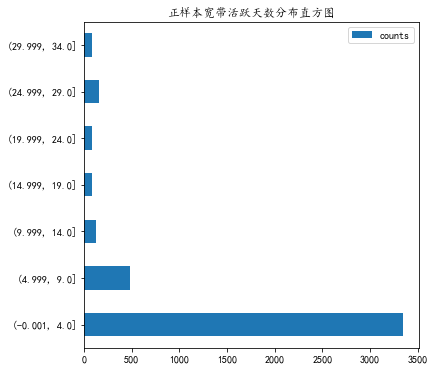

In [56]:
y_brd_active_days.plot.barh(y="counts", figsize=(6, 6), title='正样本宽带活跃天数分布直方图')

总样本数据采集不均衡，月宽带活跃天数在5天以下的占比重较大

# 对IF_ITV的统计分析

In [57]:
all_if_ITV = compulete_count_normalized_categories(df_all.IF_ITV)
y_if_ITV = compulete_count_normalized_categories(df_Y.IF_ITV)

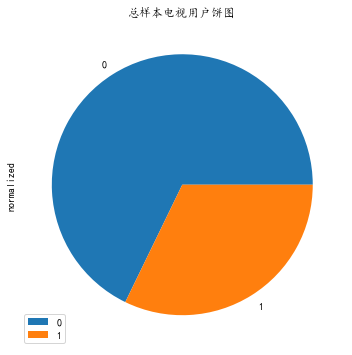

In [58]:
all_if_ITV.plot.pie(y="normalized", figsize=(6, 6), title='总样本电视用户饼图')

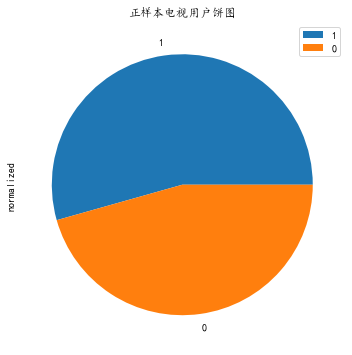

In [59]:
y_if_ITV.plot.pie(y="normalized", figsize=(6, 6), title='正样本电视用户饼图')

总样本中多数为非电视用户，但在正样本中电视用户比重增加

# 对IF_DBL_TRMNL的统计分析

In [60]:
all_if_dbl_tamnl = compulete_count_normalized_categories(df_all.IF_DBL_TRMNL)
y_if_dbl_tamnl = compulete_count_normalized_categories(df_Y.IF_DBL_TRMNL)

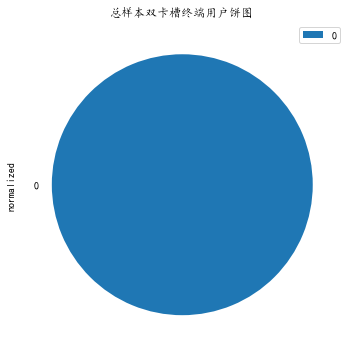

In [61]:
all_if_dbl_tamnl.plot.pie(y="normalized", figsize=(6, 6), title='总样本双卡槽终端用户饼图')

# 对IF_4G_TRMNL的统计分析

In [62]:
all_if_4g_trmnl = compulete_count_normalized_categories(df_all.IF_4G_TRMNL)
y_if_4g_trmnl = compulete_count_normalized_categories(df_Y.IF_4G_TRMNL)

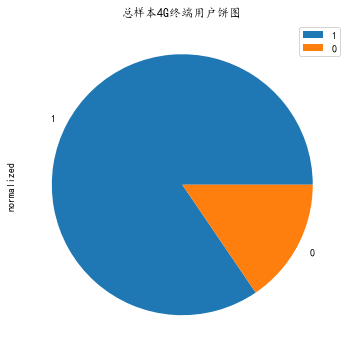

In [63]:
all_if_4g_trmnl.plot.pie(y="normalized", figsize=(6, 6), title='总样本4G终端用户饼图')

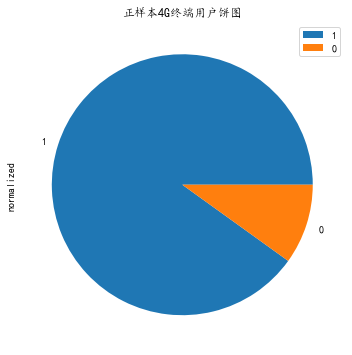

In [64]:
y_if_4g_trmnl.plot.pie(y="normalized", figsize=(6, 6), title='正样本4G终端用户饼图')

总样本与正样本分布比例相近，该特征参考价值不大

# 对TRMNL_AGE的统计分析

In [65]:
all_trmnl_age = compulete_count_normalized(df_all.TRMNL_AGE, 0, 180, 10)
y_trmnl_age = compulete_count_normalized(df_Y.TRMNL_AGE, 0, 180, 10)

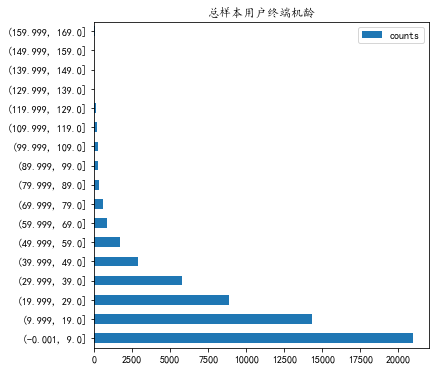

In [66]:
all_trmnl_age.plot.barh(y="counts", figsize=(6, 6), title='总样本用户终端机龄')

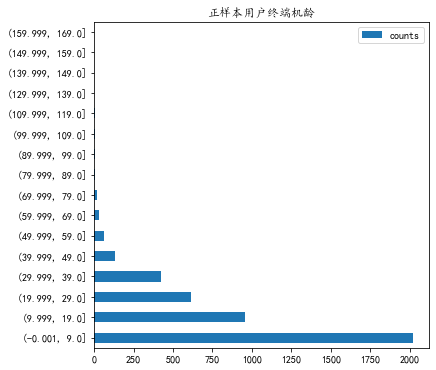

In [67]:
y_trmnl_age.plot.barh(y="counts", figsize=(6, 6), title='正样本用户终端机龄')

总样本与正样本分布比例相近

# 对IF_VOLTE的统计分析

In [68]:
all_if_volte = compulete_count_normalized_categories(df_all.IF_VOLTE)
y_if_volte = compulete_count_normalized_categories(df_Y.IF_VOLTE)

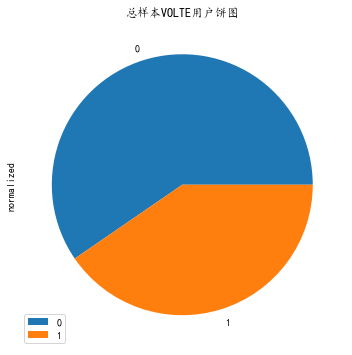

In [69]:
all_if_volte.plot.pie(y="normalized", figsize=(6, 6), title='总样本VOLTE用户饼图')

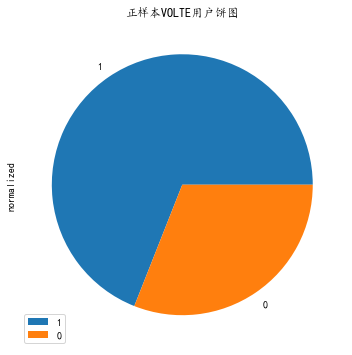

In [70]:
y_if_volte.plot.pie(y="normalized", figsize=(6, 6), title='正样本VOLTE用户饼图')

总样本与正样本分布比例相近

# 对BRD_ACTIVE_DAYS的统计分析

In [71]:
all_brd_active_days = compulete_count_normalized(df_all.BRD_ACTIVE_DAYS, 0, 40, 5)
y_brd_active_days = compulete_count_normalized(df_Y.BRD_ACTIVE_DAYS, 0, 40, 5)

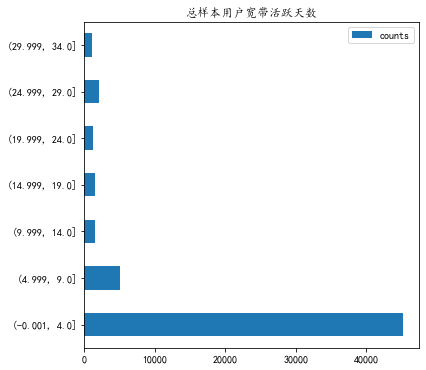

In [72]:
all_brd_active_days.plot.barh(y="counts", figsize=(6, 6), title='总样本用户宽带活跃天数')

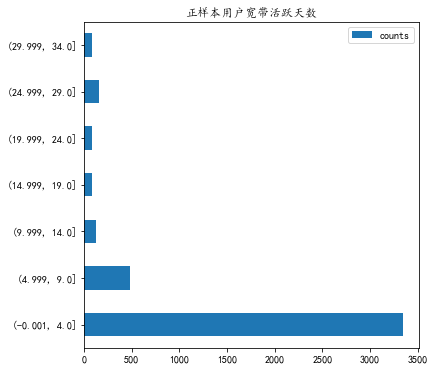

In [73]:
y_brd_active_days.plot.barh(y="counts", figsize=(6, 6), title='正样本用户宽带活跃天数')

总样本和正样本用户的宽带活跃天数都集中在四天内

# 对CHRG的统计分析

In [74]:
df_all.CHRG.max()

2047.41

In [75]:
all_chrg = compulete_count_normalized(df_all.CHRG, 0, 360, 20)
y_chrg = compulete_count_normalized(df_Y.CHRG, 0, 360, 20)

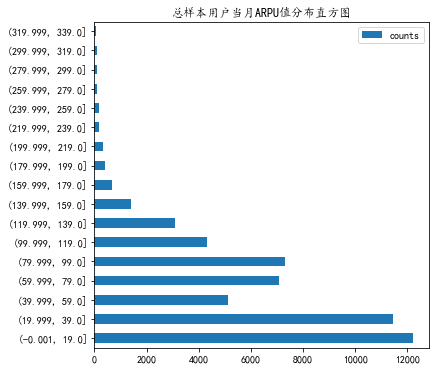

In [76]:
all_chrg.plot.barh(y="counts", figsize=(6, 6), title='总样本用户当月ARPU值分布直方图')

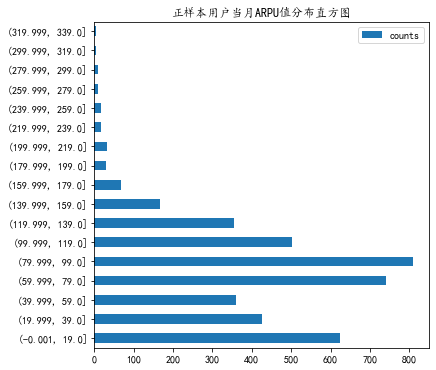

In [77]:
y_chrg.plot.barh(y="counts", figsize=(6, 6), title='正样本用户当月ARPU值分布直方图')

用户当月ARPU值的正样本分布与总样本分布存在差异，具有较高的特征选取价值

# DATA_FLOW_AMNT

In [118]:
all_data_flow_amnt = compulete_count_normalized(df_all.DATA_FLOW_AMNT, 0, 100000,5000, '当月')
y_data_flow_amnt = compulete_count_normalized(df_Y.DATA_FLOW_AMNT, 0, 100000,5000, '当月')

In [119]:
all_data_flow_amnt01 = compulete_count_normalized(df_all.DATA_FLOW_AMNT01, 0, 100000,5000, '上月')
y_data_flow_amnt01 = compulete_count_normalized(df_Y.DATA_FLOW_AMNT01, 0, 100000,5000, '上月')

In [120]:
all_data_flow_amnt02 = compulete_count_normalized(df_all.DATA_FLOW_AMNT02, 0, 100000,5000, '上上月')
y_data_flow_amnt02 = compulete_count_normalized(df_Y.DATA_FLOW_AMNT02, 0, 100000,5000, '上上月')

In [124]:
concat_all_data_flow_amnt = pd.concat([all_data_flow_amnt.当月, all_data_flow_amnt01.上月, all_data_flow_amnt02.上上月] ,axis=1)

In [125]:
concat_all_data_flow_amnt = concat_all_data_flow_amnt.reindex([(x.right+1) for x in concat_all_data_flow_amnt.index])

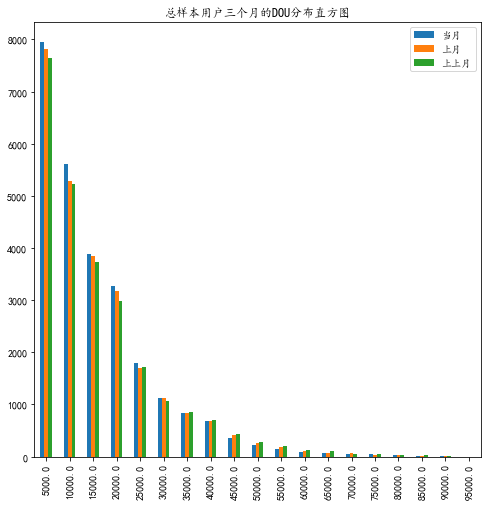

In [127]:
concat_all_data_flow_amnt.plot.bar(legend=True, figsize=(8, 8), title='总样本用户三个月的DOU分布直方图')

In [128]:
concat_y_data_flow_amnt = pd.concat([y_data_flow_amnt.当月, y_data_flow_amnt01.上月, y_data_flow_amnt02.上上月] ,axis=1)
concat_y_data_flow_amnt = concat_y_data_flow_amnt.reindex([(x.right+1) for x in concat_y_data_flow_amnt.index])

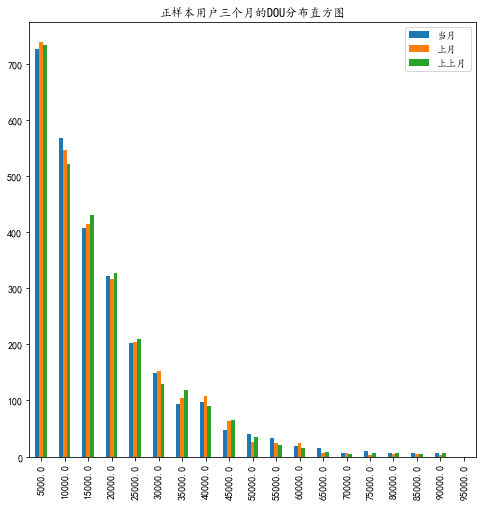

In [129]:
concat_y_data_flow_amnt.plot.bar(legend=True, figsize=(8, 8), title='正样本用户三个月的DOU分布直方图')

# 对CALL_DRTN的统计分析

In [133]:
all_call_drtn = compulete_count_normalized(df_all.CALL_DRTN, 0,2000,100, '当月')
y_call_drtn = compulete_count_normalized(df_Y.CALL_DRTN, 0, 2000,100, '当月')

In [134]:
all_call_drtn01 = compulete_count_normalized(df_all.CALL_DRTN01, 0,2000,100, '上月')
y_call_drtn01 = compulete_count_normalized(df_Y.CALL_DRTN01, 0, 2000,100, '上月')

In [135]:
all_call_drtn02 = compulete_count_normalized(df_all.CALL_DRTN02, 0,2000,100, '上上月')
y_call_drtn02 = compulete_count_normalized(df_Y.CALL_DRTN02, 0, 2000,100, '上上月')

In [136]:
concat_all_call_drtn = pd.concat([all_call_drtn.当月, all_call_drtn01.上月, all_call_drtn02.上上月] ,axis=1)
concat_all_call_drtn = concat_all_call_drtn.reindex([(x.right+1) for x in concat_all_call_drtn.index])

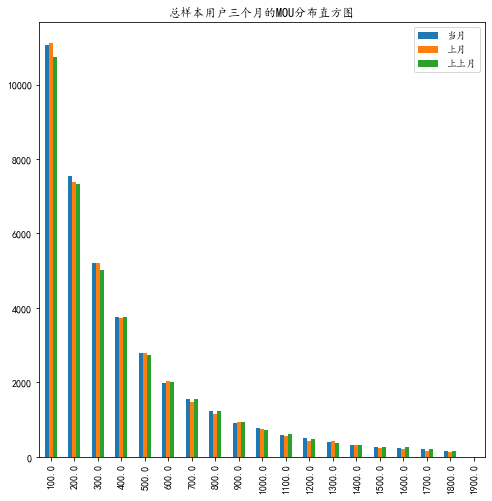

In [137]:
concat_all_call_drtn.plot.bar(legend=True, figsize=(8, 8), title='总样本用户三个月的MOU分布直方图')

In [138]:
concat_y_call_drtn = pd.concat([y_call_drtn.当月, y_call_drtn01.上月, y_call_drtn02.上上月] ,axis=1)
concat_y_call_drtn = concat_y_call_drtn.reindex([(x.right+1) for x in concat_y_call_drtn.index])

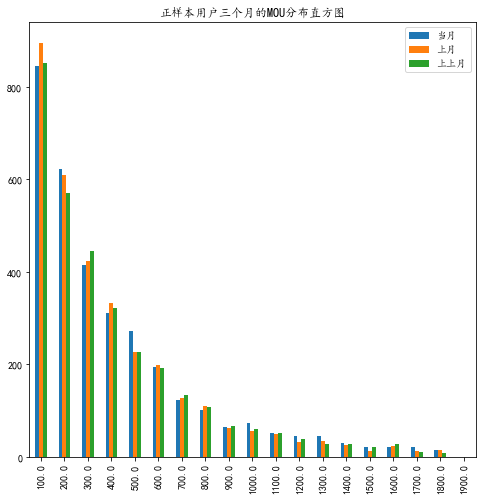

In [141]:
concat_y_call_drtn.plot.bar(legend=True, figsize=(8, 8), title='正样本用户三个月的MOU分布直方图')

# 对DATA_FLOW_AMNT_PRV的统计分析

In [78]:
all_data_flow_amnt_prv  = compulete_count_normalized(df_all.DATA_FLOW_AMNT_PRV, 0,2000,100)
y_data_flow_amnt_prv = compulete_count_normalized(df_Y.DATA_FLOW_AMNT_PRV, 0, 2000,100)

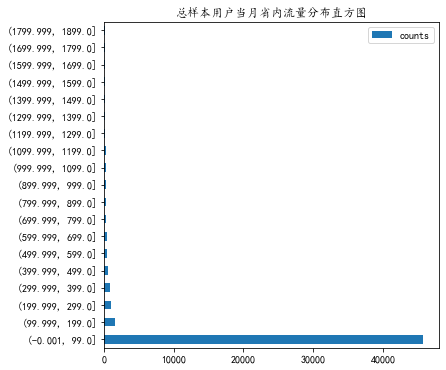

In [79]:
all_data_flow_amnt_prv.plot.barh(y="counts", figsize=(6, 6), title='总样本用户当月省内流量分布直方图')

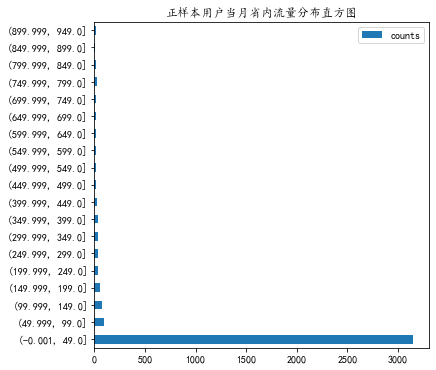

In [246]:
y_data_flow_amnt_prv.plot.barh(y="counts", figsize=(6, 6), title='正样本用户当月省内流量分布直方图')

总样本与正样本的用户当月省内流量都集中在50M内，该流量继续细粒度划分意义不大，该特征分析价值不大

# 对DATA_FLOW_AMNT_ROAM_PRV的统计分析

In [150]:
all_data_flow_amnt_roam_prv = compulete_count_normalized(df_all.DATA_FLOW_AMNT_ROAM_PRV, 0, 10000, 500,'当月')
y_data_flow_amnt_roam_prv = compulete_count_normalized(df_Y.DATA_FLOW_AMNT_ROAM_PRV, 0, 10000, 500,'当月')

In [151]:
all_data_flow_amnt_roam_prv01 = compulete_count_normalized(df_all.DATA_FLOW_AMNT_ROAM_PRV01, 0, 10000, 500,'上月')
y_data_flow_amnt_roam_prv01 = compulete_count_normalized(df_Y.DATA_FLOW_AMNT_ROAM_PRV01, 0, 10000, 500,'上月')

In [152]:
all_data_flow_amnt_roam_prv02 = compulete_count_normalized(df_all.DATA_FLOW_AMNT_ROAM_PRV02, 0, 10000, 500,'上上月')
y_data_flow_amnt_roam_prv02 = compulete_count_normalized(df_Y.DATA_FLOW_AMNT_ROAM_PRV02, 0, 10000, 500,'上上月')

In [154]:
concat_all_data_flow_amnt_roam_prv = pd.concat([all_data_flow_amnt_roam_prv.当月, 
                                                all_data_flow_amnt_roam_prv01.上月,
                                                all_data_flow_amnt_roam_prv02.上上月] ,axis=1)
concat_all_data_flow_amnt_roam_prv = concat_all_data_flow_amnt_roam_prv.reindex([(x.right+1) for x in concat_all_data_flow_amnt_roam_prv.index])

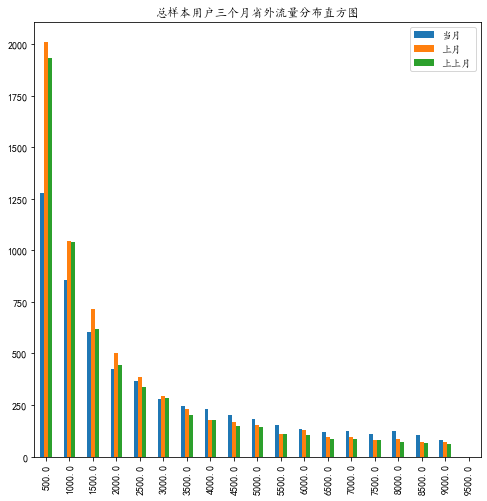

In [155]:
concat_all_data_flow_amnt_roam_prv.plot.bar(legend=True, figsize=(8, 8), title='总样本用户三个月省外流量分布直方图')

In [156]:
concat_y_data_flow_amnt_roam_prv = pd.concat([y_data_flow_amnt_roam_prv.当月, 
                                                y_data_flow_amnt_roam_prv01.上月,
                                                y_data_flow_amnt_roam_prv02.上上月] ,axis=1)
concat_y_data_flow_amnt_roam_prv = concat_y_data_flow_amnt_roam_prv.reindex([(x.right+1) for x in concat_y_data_flow_amnt_roam_prv.index])

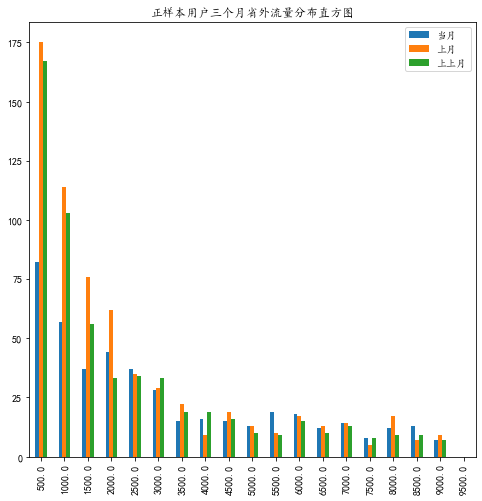

In [157]:
concat_y_data_flow_amnt_roam_prv.plot.bar(legend=True, figsize=(8, 8), title='正样本用户三个月省外流量分布直方图')

# 对DATA_FLOW_AMNT_5G的统计分析

In [256]:
df_all.DATA_FLOW_AMNT_5G.max()

61726.75

In [158]:
all_data_flow_amnt_5G = compulete_count_normalized(df_all.DATA_FLOW_AMNT_5G, 0,10000, 500)
y_data_flow_amnt_5G = compulete_count_normalized(df_Y.DATA_FLOW_AMNT_5G, 0,10000, 500)

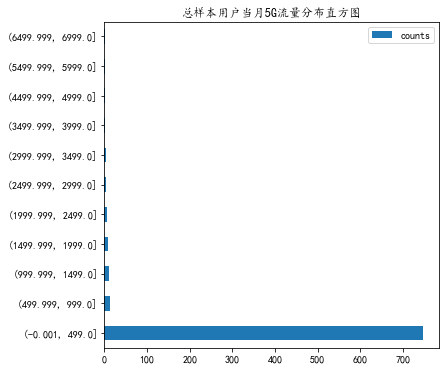

In [159]:
all_data_flow_amnt_5G.plot.barh(y="counts", figsize=(6, 6), title='总样本用户当月5G流量分布直方图')

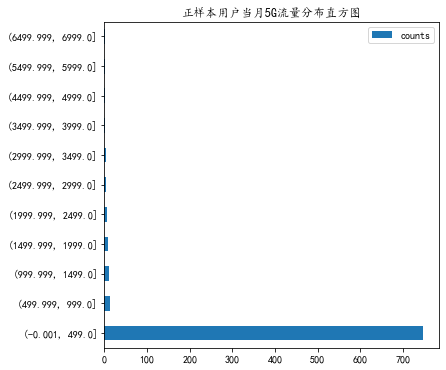

In [160]:
y_data_flow_amnt_5G.plot.barh(y="counts", figsize=(6, 6), title='正样本用户当月5G流量分布直方图')

# 对DATA_FLOW_AMNT_4G的统计分析

In [275]:
df_all.DATA_FLOW_AMNT_4G.max()

237053.94

In [276]:
all_data_flow_amnt_4G = compulete_count_normalized(df_all.DATA_FLOW_AMNT_4G, 0,24000, 500)
y_data_flow_amnt_4G = compulete_count_normalized(df_Y.DATA_FLOW_AMNT_4G, 0,24000, 500)

In [277]:
all_data_flow_amnt_4G = all_data_flow_amnt_4G.sort_values(by=["counts"], ascending=False).head(20)
y_data_flow_amnt_4G = y_data_flow_amnt_4G.sort_values(by=["counts"], ascending=False).head(15)

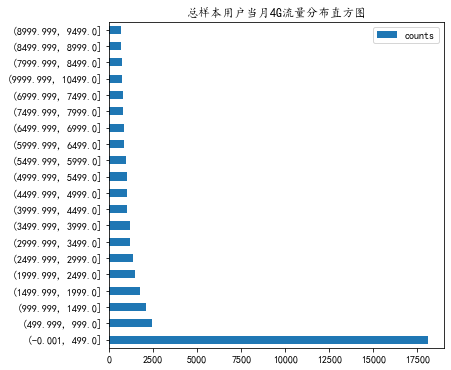

In [278]:
all_data_flow_amnt_4G.plot.barh(y="counts", figsize=(6, 6), title='总样本用户当月4G流量分布直方图')

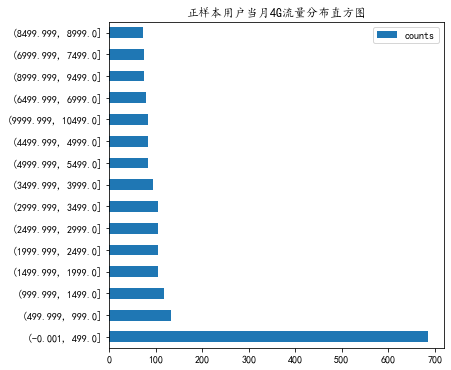

In [279]:
y_data_flow_amnt_4G.plot.barh(y="counts", figsize=(6, 6), title='正样本用户当月4G流量分布直方图')

# 对SMS_COUNT的统计分析

In [280]:
df_all.SMS_COUNT.max()

6284.0

In [289]:
all_sms_count = compulete_count_normalized(df_all.SMS_COUNT, 0, 24, 2)
y_sms_count = compulete_count_normalized(df_Y.SMS_COUNT, 0, 24, 2)

In [290]:
# all_sms_count = all_sms_count.sort_values(by=["counts"], ascending=False).head(20)
# y_sms_count = y_sms_count.sort_values(by=["counts"], ascending=False).head(20)

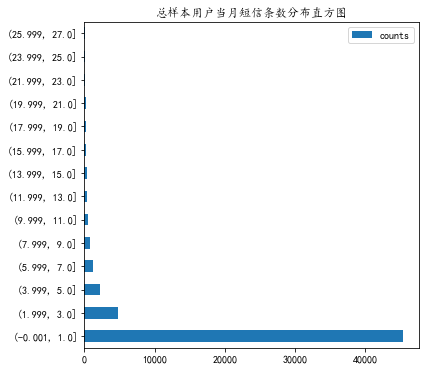

In [291]:
all_sms_count.plot.barh(y="counts", figsize=(6, 6), title='总样本用户当月短信条数分布直方图')

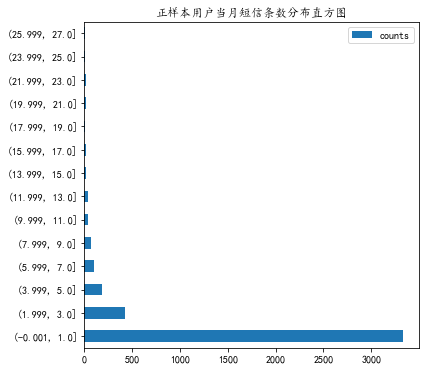

In [292]:
y_sms_count.plot.barh(y="counts", figsize=(6, 6), title='正样本用户当月短信条数分布直方图')

该特征价值不大

# 对CALLED_DRTN的统计分析

In [169]:
all_called_drtn = compulete_count_normalized(df_all.CALLED_DRTN, 0, 2000, 100, '当月')
y_called_drtn = compulete_count_normalized(df_Y.CALLED_DRTN, 0, 2000, 100, '当月')

In [165]:
all_called_drtn01 = compulete_count_normalized(df_all.CALLED_DRTN01, 0, 2000, 100, '上月')
y_called_drtn01 = compulete_count_normalized(df_Y.CALLED_DRTN01, 0, 2000, 100, '上月')

In [166]:
all_called_drtn02 = compulete_count_normalized(df_all.CALLED_DRTN02, 0, 2000, 100, '上上月')
y_called_drtn02 = compulete_count_normalized(df_Y.CALLED_DRTN02, 0, 2000, 100, '上上月')

In [167]:
all_called_drtn03 = compulete_count_normalized(df_all.CALLED_DRTN03, 0, 2000, 100, '前三月')
y_called_drtn03 = compulete_count_normalized(df_Y.CALLED_DRTN03, 0, 2000, 100, '前三月')

In [170]:
concat_all_called_drtn = pd.concat([all_called_drtn.当月, 
                                    all_called_drtn01.上月,
                                    all_called_drtn02.上上月,
                                   all_called_drtn03.前三月] ,axis=1)
concat_all_called_drtn = concat_all_called_drtn.reindex([(x.right+1) for x in concat_all_called_drtn.index])

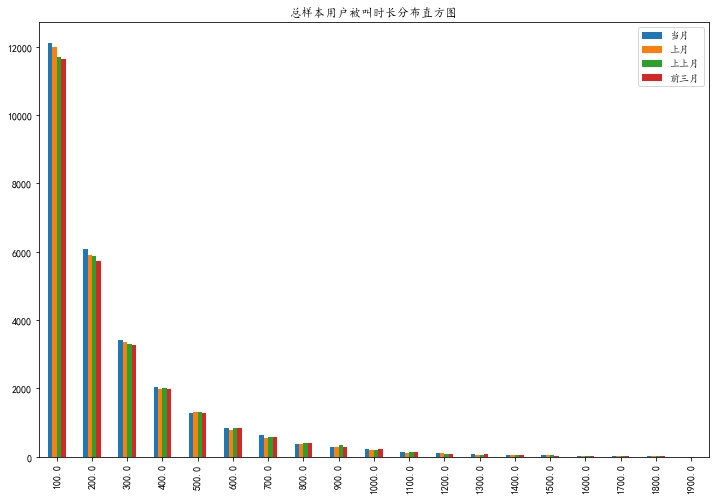

In [173]:
concat_all_called_drtn.plot.bar(figsize=(12, 8), title='总样本用户被叫时长分布直方图')

In [174]:
concat_y_called_drtn = pd.concat([y_called_drtn.当月, 
                                    y_called_drtn01.上月,
                                    y_called_drtn02.上上月,
                                   y_called_drtn03.前三月] ,axis=1)
concat_y_called_drtn = concat_y_called_drtn.reindex([(x.right+1) for x in concat_y_called_drtn.index])

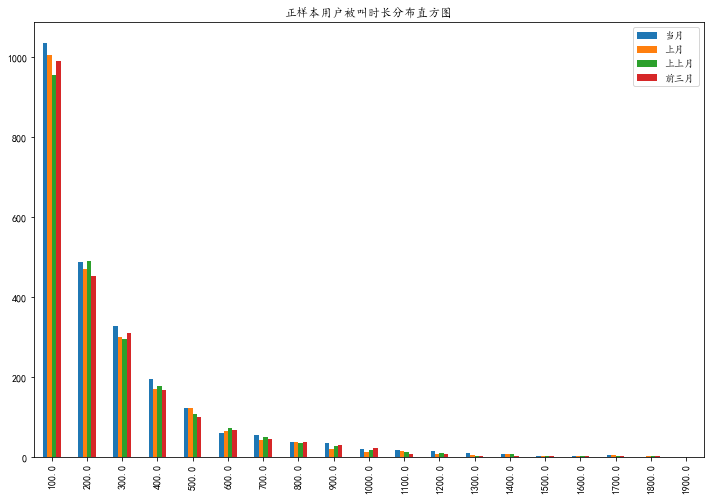

In [175]:
concat_y_called_drtn.plot.bar(figsize=(12, 8), title='正样本用户被叫时长分布直方图')

# 对CALL_COUNT的统计分析

In [315]:
df_all.CALL_COUNT.max()

2429

In [318]:
all_call_count = compulete_count_normalized(df_all.CALLED_DRTN03, 0, 1000, 50)
y_call_count = compulete_count_normalized(df_Y.CALLED_DRTN03, 0, 1000, 50)

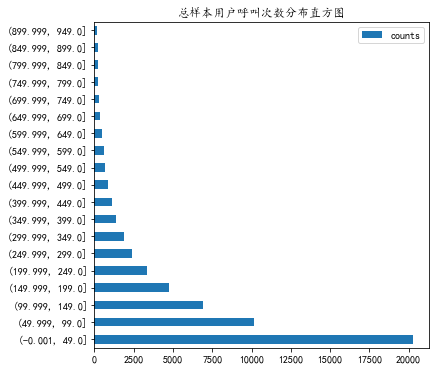

In [319]:
all_call_count.plot.barh(y="counts", figsize=(6, 6), title='总样本用户呼叫次数分布直方图')

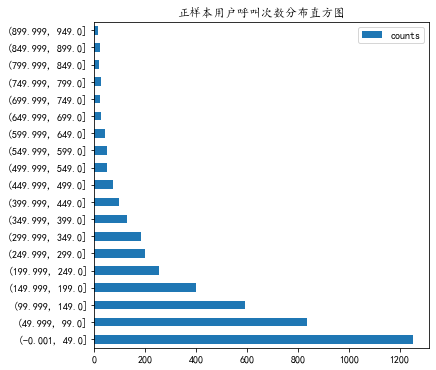

In [320]:
y_call_count.plot.barh(y="counts", figsize=(6, 6), title='正样本用户呼叫次数分布直方图')

# 对CALLING_DRTN01的统计分析

In [177]:
df_all.CALLING_DRTN01.max()

5054.0

In [178]:
all_calling_drtn01 = compulete_count_normalized(df_all.CALLING_DRTN01, 0, 2000, 100, '上月')
y_calling_drtn01 = compulete_count_normalized(df_Y.CALLING_DRTN01, 0, 2000, 100, '上月')

In [179]:
all_calling_drtn02 = compulete_count_normalized(df_all.CALLING_DRTN02, 0, 2000, 100, '上上月')
y_calling_drtn02 = compulete_count_normalized(df_Y.CALLING_DRTN02, 0, 2000, 100, '上上月')

In [180]:
all_calling_drtn03 = compulete_count_normalized(df_all.CALLING_DRTN03, 0, 2000, 100, '前三月')
y_calling_drtn03 = compulete_count_normalized(df_Y.CALLING_DRTN03, 0, 2000, 100, '前三月')

In [182]:
concat_all_calling_drtn = pd.concat([
                                    all_calling_drtn01.上月,
                                    all_calling_drtn02.上上月,
                                   all_calling_drtn03.前三月] ,axis=1)
concat_all_calling_drtn = concat_all_calling_drtn.reindex([(x.right+1) for x in concat_all_calling_drtn.index])

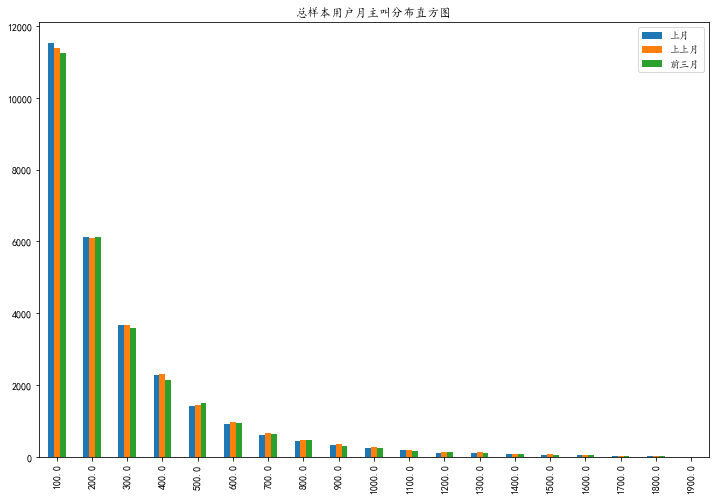

In [183]:
concat_all_calling_drtn.plot.bar(figsize=(12, 8), title='总样本用户月主叫分布直方图')

In [184]:
concat_y_calling_drtn = pd.concat([
                                    y_calling_drtn01.上月,
                                    y_calling_drtn02.上上月,
                                   y_calling_drtn03.前三月] ,axis=1)
concat_y_calling_drtn = concat_y_calling_drtn.reindex([(x.right+1) for x in concat_y_calling_drtn.index])

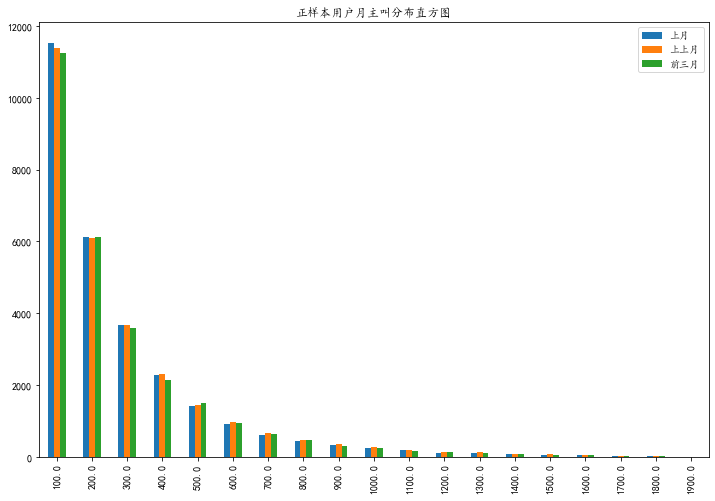

In [185]:
concat_all_calling_drtn.plot.bar(figsize=(12, 8), title='正样本用户月主叫分布直方图')

# 依据部分特征进行筛选

In [117]:
all_if_touch = compulete_count_normalized_categories(df_all.IF_TOUCH)
all_if_touch

,counts,normalized
0,53425,0.924516
1,4362,0.075484


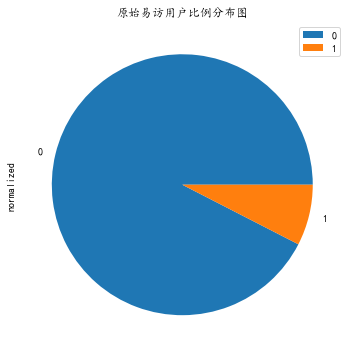

In [118]:
all_if_touch.plot.pie(y="normalized", figsize=(6, 6), title='原始易访用户比例分布图')

In [116]:
df_test = df_all[(df_all['AGE_SEG']>=20) & (df_all['AGE_SEG']<=60)
                 & (df_all['IF_SCHOOL']==0) & (df_all['IF_GROUP']==0)
                 & (df_all['BRD_RAX']>=90)
                 & (df_all['IF_BRD']==1) & (df_all['IF_ITV']==1)]
all_if_touch_test = compulete_count_normalized_categories(df_test.IF_TOUCH)
all_if_touch_test

,counts,normalized
0,2206,0.603722
1,1448,0.396278


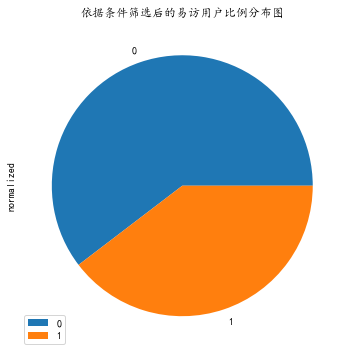

In [119]:
all_if_touch_test.plot.pie(y="normalized", figsize=(6, 6), title='依据条件筛选后的易访用户比例分布图')